# Lab Assignment 04
The objective of this lab assignment is to build and evaluate classification models to predict customer churn given information from customers of a telephone company (`data_lab_04.csv`).

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Each task and question is worth **0.5 points** (out of **10 points**).

#### Submission:
This assignment is due **Sunday, October 18, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. To save your Jupyter notebook as a PDF file, go to `File > Export Notebook As > HTML` or `File > Download As > HTML`, open the HTML file and print it as a PDF file. Additionally, this assignment has a single question on Gradescope and **all pages of the PDF file** must be assigned to this question. A **0.5-point (5%) penalty** will be applied to submissions that do not follow these guidelines. For more instructions on how to submit assignments on Gradescope, see this [guide](http://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf).

Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Decision Trees

In [24]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [25]:
# Load dataset and display the first five rows
data = pd.read_csv('data_lab_04.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 14): Partition the dataset into training set and test set using the `train_test_split` method.
Use 75% of the data for training and 25% for testing and set parameter `random_state` to 0.**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:17], data.iloc[:,-1], test_size = 0.25, random_state = 0)

In [27]:
# Show the dimensionality of the training set and the test set
# The training set should have 2499 observations and the test set should have 834 observations
print(x_train.shape)
print(x_test.shape)

(2499, 17)
(834, 17)


**Task 02 (of 14): Standardize the training set and test set.**
_Hint:_ Compute the mean and standard deviation using only the training set to avoid introducing bias and then apply this transformation on the training set and test set.

In [28]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Task 03 (of 14): Build a decision tree classifier to classify customers as churnend/non-churned.
Use entropy as the split criterion and set parameter `random_state` to 0.**

In [29]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 238,  4,  1.37790751e+00, 0.60293799, 2499, 2.499e+03)
 (  2, 199, 16,  1.47932547e+00, 0.4991475 , 2278, 2.278e+03)
 (  3, 186,  1,  1.39084876e+00, 0.37934172, 2105, 2.105e+03)
 (  4, 135,  6,  7.91448623e-01, 0.26832186, 1921, 1.921e+03)
 (  5,   6, 12, -1.40246254e+00, 0.1779243 , 1681, 1.681e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  124, 1.240e+02)
 (  7,   8, 10, -1.40125614e+00, 0.18885385, 1557, 1.557e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 (  9,  26,  7, -6.43222064e-01, 0.18567934, 1556, 1.556e+03)
 ( 10,  25, 13,  3.73752005e-02, 0.09482908,  411, 4.110e+02)
 ( 11,  22, 13,  1.76009070e-03, 0.16417121,  207, 2.070e+02)
 ( 12,  17,  3,  1.93759680e+00, 0.11102003,  203, 2.030e+02)
 ( 13,  16,  0, -1.88109082e+00, 0.04741446,  190, 1.900e+02)
 ( 14,  15,  5, -1.34136140e+00, 0.72192809,    5, 5.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    4, 4.000e+00)
 ( -1,  

283

**Question 01 (of 06): How many nodes are in the tree? Which variable was selected to split the root node of the tree? What can you conclude from observing the structure of the tree?**

**Answer:** The total of 283 nodes. 'Total day minutes' was selected to split the root node of the tree. The decision tree has large number of nodes and could potential cause the over fitting

**Task 04 (of 14): Predict the class labels for the test set using the decision tree classifier and plot the corresponding confusion matrix.**

In [31]:
y_pred = classifier.predict(x_test_scaled)

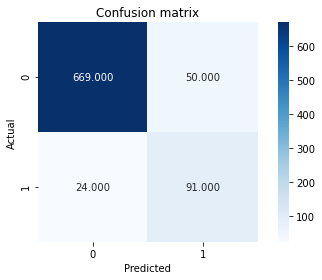

In [32]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 05 (of 14): Compute evaluation metrics for the decision tree classifier.**

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9112709832134293, 0.08872901678657075, array([0.96536797, 0.64539007]), array([0.93045897, 0.79130435]), array([0.94759207, 0.7109375 ])]


**Question 02 (of 06): What can you conclude about the performance of the decision tree classifier?**

**Answer:** The model is 91% accuracy observation were classified correctly. Based on F1 score, the classifier measure class 0 better than class 1

### Part 2: k-Nearest Neighbors

**Task 06 (of 14): Build a k-nearest neighbors classifier to classify customers as churnend/non-churned.
Use _k=3_ as the number of nearest neighbors.**

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

**Task 07 (of 14): Predict the class labels for the test set using the k-nearest neighbors classifier and plot the corresponding confusion matrix.**

In [35]:
y_pred = classifier.predict(x_test_scaled)

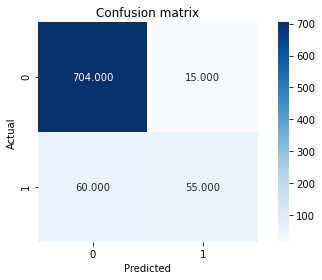

In [36]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 08 (of 14): Compute evaluation metrics for the k-nearest neighbors classifier.**

In [37]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9100719424460432, 0.08992805755395683, array([0.92146597, 0.78571429]), array([0.97913769, 0.47826087]), array([0.94942684, 0.59459459])]


**Question 03 (of 06): What can you conclude about the performance of the k-nearest neighbors classifier? How does it compare to the previous classifier?**

**Answer:** The model is 91% accuracy observation were classified correctly. The precison and recall of class 1 are low, and based on F1 score the classifier measure class 0 better than class 1

### Part 3: Naive Bayes

**Task 09 (of 14): Build a Naive Bayes classifier to classify customers as churnend/non-churned.**

In [38]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled, y_train)

GaussianNB()

**Task 10 (of 14): Predict the class labels for the test set using the Naive Bayes classifier and plot the corresponding confusion matrix.**

In [39]:
y_pred = classifier.predict(x_test_scaled)

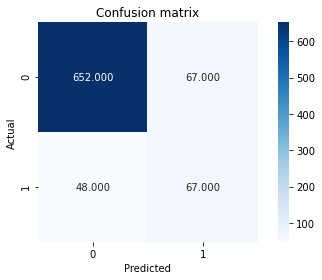

In [40]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 11 (of 14): Compute evaluation metrics for the Naive Bayes classifier.**

In [41]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8621103117505995, 0.1378896882494005, array([0.93142857, 0.5       ]), array([0.90681502, 0.5826087 ]), array([0.91895701, 0.53815261])]


**Question 04 (of 06): What can you conclude about the performance of the Naive Bayes classifier? How does it compare to the previous classifiers?**

**Answer:** The model is 86% accuracy observation were classified correctly. The precison and recall of class 1 are very low, and based on F1 score the classifier measure class 0 better than class 1

### Part 4: Support Vector Machines

**Task 12 (of 14): Build an SVM classifier to classify customers as churnend/non-churned.
Use _rbf_ (radial basis function) as the kernel function.**

In [42]:
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled, y_train)

SVC()

**Task 13 (of 14): Predict the class labels for the test set using the SVM classifier and plot the corresponding confusion matrix.**

In [43]:
y_pred = classifier.predict(x_test_scaled)

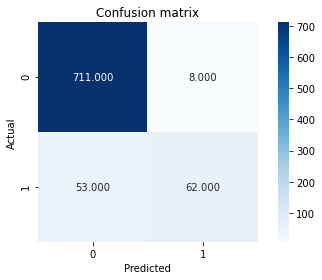

In [44]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 14 (of 14): Compute evaluation metrics for the SVM classifier.**

In [45]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.9268585131894485, 0.07314148681055155, array([0.93062827, 0.88571429]), array([0.98887344, 0.53913043]), array([0.95886716, 0.67027027])]


**Question 05 (of 06): What can you conclude about the performance of the SVM classifier? How does it compare to the previous classifiers?**

**Answer:** The model is 92% accuracy observation were classified correctly. The recall of class 1 is very low, and based on F1 score the classifier measure class 0 better than class 1

**Question 06 (of 06): Which of the classifiers had the best performance?**

**Answer:** Based on F1 score, the decision tree classifier had the best perforance